# Analítica de datos
# Examen parcial 1
# 2019 - 01
# <font color='red'> CRISTIAN RODRIGUEZ, A00058176 </font>

 El dataset que deben analizar contiene registros de pacientes con síntomas de problemas cardíacos.
 Se tienen los datos provenientes bases de datos de enfermedades del corazón, provenientes de diferentes centros médicos:
 - Cleveland Clinic Foundation
 - Hungarian Institute of Cardiology, Budapest
 - University Hospital, Zurich, & University Hospital, Basel, Switzerland 

 Los campos del dataset son los siguientes:
 1. ciudad: ciudad del paciente (Cleveland, Hungria, Suiza)
 2. edad: en años
 3. sexo: "1"=hombre, "0"=mujer
 4. tipo_dolor: tipo de dolor de pecho ("1"=angina típico, "2"=angina atípico, "3"=dolor no de angina, "4"=sin síntoma de dolor)
 5. presion: presión de la sangre en reposo (en mm/Hg, en el momento de admisión al hospital)
 6. colesterol: en densidad del colesterol (en mg/dl)
 7. azucar: indica si el nivel de azucar en la sangre en ayunas es superior a 120 mg/dl ("1") o no ("0")
 8. ecg: resultado el electro cardiograma ("0"=normal, "1"=anormalidad del nivel de ST, "2"=hipertrofía ventricular probable)
 9. pulso: frecuencia cardiaca máxima alcanzada
 10. angina: si se induce a una angina a través del ejercicio ("1") o no ("0")
 11. st: diferencia relativa entre el nivel de ST inducido por el ejercicio comparado con el nivel del reposo.
 12. pendiente: la pendiente de llegada al máximo del nivel ST durante el ejercicio ("1"creciente, "2"=plana, "3"=decreciente)
 13. venas: número de venas coloreadas a partir de la fluorescopia (0 a 3)
 14. thal: tipo de defecto (valores aceptados 3=normal, 4=defecto arreglado, 7=defecto reversible)
 15. target: indica si en efecto el paciente presenta una enfermedad cardiaca ("1", "2", "3", "4") o no ("0")


 La idea es poder predecir, utilizando dos tipos de modelo de aprendizaje supervisado (KNN y NaiveBayes) y las variables independientes disponibles qué pacientes pueden presentar mayor o menor riesgo de tener una enfermedad cardiaca. Vamos entonces a considerar como categoría positiva los valores "1", "2", "3" y "4" de la variable *target*, y como categoría negativa su valor "0".

 # 1. Entendimiento de los datos, limpieza

 El archivo "DatosCorazon.csv" contiene el dataset que tienen que analizar.
 Se recomienda abrirlo primero en un lector de archivos planos para entender preliminarmente su formato y así poderlo cargar adecuadamente con Python.

 Teniendo en cuenta el tipo de problema en cuestión (clasificación o regresión), realice un análisis exploratorio de los datos estableciendo el baseline, verificando la calidad de los datos (tipos de las variables, valores inválidos, excepciones, valores faltantes, etc.), utilizando gráficos para poder entender las distribuciones de los datos e identificar posibles problemas.

## Puntos a desarrollar

 1. <font color='red'>Carguen el archivo en memoria y exploren los datos. Antes de hacer limpieza identifiquen las proporciones de los datos provenientes de cada centro médico (ciudad), el baseline global (0.3) y los baselines por ciudad (0.3), y el baseline global . No olviden las convenciones de la variable objetiva definidas con respecto a como se define la clase positiva. 
    ¿Cree que es una buena idea diagnosticar a un paciente de Cleveland utilizando un modelo entrenado con todos los datos disponibles de las 3 ciudades? (0.2).</font>

 1. <font color='red'>Identifiquen los problemas e inconsistencias que tienen los datos, teniendo en cuenta el diccionario de datos y el contexto del problema. Limpien los datos, argumentando las razones de cada transformación o eliminación de datos.
 (1.5)</font>

 Tenga en cuenta lo siguiente: 
 - para modificar ciertos valores de un dataframe, se utiliza "df.replace('oldvalue', 'newvalue')", si se trata de un valor NaN, se utiliza *np.nan* (ya sea el oldvalue o el newvalue)
 - para cambiar un tipo de dato a numérico en una estructura de pandas, se utiliza su método ".astype('float64')"
 - para negar una condición en python se utiliza el símbolo "~"
 - para obtener una tabla de frecuencias de los registros (filas) con respecto al valor de una variable categórica se utiliza "pd.crosstab(index=df['var'], columns="conteo")
 - para cambiar los valores de una columna en un dataframe con condiciones, utilizar "df.loc[condicion, 'columna']=newVal"
 - cuando haya atributos con demasiados valores faltantes, pueden eliminar la columna correspondiente.
 - cuando haya atributos con unos pocos valores faltantes, pueden eliminar los registros correspondientes.
 - cuando el número de valores faltantes de un atributo no sea tan elevado, pero si sea considerable, pueden reemplazar los valores faltantes:
   - Si se trata de una variable categórica, pueden crear un nuevo valor, o reemplazar por la categoría más común
   - Si se trata de una variable numérica, pueden reemplazar por el promedio de los valores presentes del atributo

 # 1.1 Carga y baselines pre-limpieza de datos


In [3]:
import numpy as np #operaciones matriciales y con vectores
import pandas as pd #tratamiento de datos
import matplotlib.pyplot as plt #gráficos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split #metodo de particionamiento de datasets para evaluación
from sklearn.model_selection import cross_val_score #protocolo de evaluación
from sklearn import neighbors, datasets, metrics
from sklearn import preprocessing 
from sklearn.metrics import cohen_kappa_score, make_scorer
import seaborn as sns

#### Se colocaron los nombres para las columnas en edición desde un archivo de texto.


In [4]:
data = pd.read_csv('DatosCorazon.csv', sep=";")
data.head()

,ciudad,edad,sexo,tipo_dolor,presion,colesterol,azucar,ecg,pulso,angina,st,pendiente,venas,thal,target
0,Cleveland,63.0,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0,6,0
1,Cleveland,67.0,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3,3,2
2,Cleveland,67.0,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2,7,1
3,Cleveland,37.0,1,3,130.0,250.0,0,0,187.0,0,3.5,3,0,3,0
4,Cleveland,41.0,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0,3,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 15 columns):
ciudad        720 non-null object
edad          720 non-null float64
sexo          720 non-null int64
tipo_dolor    720 non-null int64
presion       720 non-null object
colesterol    720 non-null object
azucar        720 non-null object
ecg           720 non-null object
pulso         720 non-null object
angina        720 non-null object
st            720 non-null object
pendiente     720 non-null object
venas         720 non-null object
thal          720 non-null object
target        720 non-null int64
dtypes: float64(1), int64(3), object(11)
memory usage: 84.5+ KB


In [6]:
data.describe(include='all')


,ciudad,edad,sexo,tipo_dolor,presion,colesterol,azucar,ecg,pulso,angina,st,pendiente,venas,thal,target
count,720,720.000000,720.000000,720.000000,720,720,720,720,720,720,720,720,720,720,720.000000
unique,3,NaN,NaN,NaN,86,307,3,4,188,3,61,6,6,6,NaN
top,Cleveland,NaN,NaN,NaN,120,0,0,0,150,0,0,2,?,?,NaN
freq,303,NaN,NaN,NaN,78,123,567,471,32,476,330,290,413,320,NaN
mean,NaN,51.888889,0.738889,3.179167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.850000
std,NaN,9.193720,0.439546,0.953646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.076878
min,NaN,28.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,45.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,53.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000
75%,NaN,58.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


#### Convierto a string las variables categoricas para poder hacer un conteo en los baselines

In [7]:
data.sexo = data.sexo.astype(str)
data.tipo_dolor = data.tipo_dolor.astype(str)
data.target = data.target.astype(str)

data.dtypes

ciudad         object
edad          float64
sexo           object
tipo_dolor     object
presion        object
colesterol     object
azucar         object
ecg            object
pulso          object
angina         object
st             object
pendiente      object
venas          object
thal           object
target         object
dtype: object

 ## Baseline
 ### Baseline global


 Aqui realizaremos una visualizacion de datos para observar cuales son las proporciones para el baseline global. Enocntraremos el count de todos los valores mayores a cero y luego lo dividiremos entre el total de los datos. Esto nos dara una probabilidad general y primitiva de que probabilidad existe de que tenga una enfermedad al corazón.

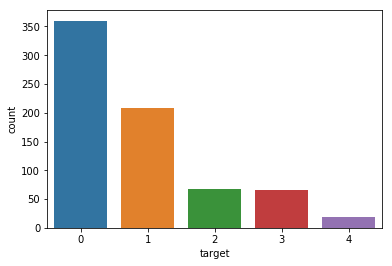

In [8]:
ax = sns.countplot(x="target", data=data)

In [9]:
data.target[data.target>"0"].aggregate('count')

360

In [10]:
data.shape[0]

720

In [11]:
baseline_global = data.target[data.target>"0"].aggregate('count') / data.shape[0] *100
print ('La probabilidad de que el paciente tenga una enfermedad cardiaca es de:' )
print (baseline_global)

La probabilidad de que el paciente tenga una enfermedad cardiaca es de:
50.0


 ### Baseline por ciudad

Aqui realizaremos una visualizacion de datos para observar cuales son las proporciones para cada uno de los baselines por ciudad. Enocntraremos el count de todos los valores mayores a cero por ciudad y luego lo dividiremos entre el total de los datos por ciudad. Esto nos dara una probabilidad general y primitiva de que probabilidad existe de que tenga una enfermedad al corazón.

In [12]:
len (data[data.ciudad == 'Cleveland'])

303

In [13]:
len (data[data.ciudad == 'Hungria'])

294

In [14]:
len (data[data.ciudad == 'Suiza'])

123

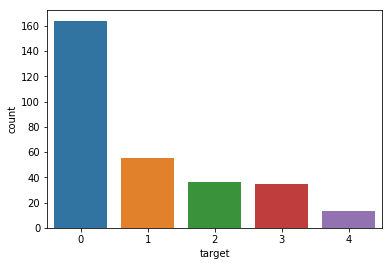

In [15]:
# Cleveland
axC = sns.countplot(x="target", data=data[data.ciudad == 'Cleveland'])

# esta variable nos dice la cantidad de personas que tienen problemas del corazon en Cleveland
data[data.ciudad == 'Cleveland'].target[data.target>"0"].aggregate('count')

baseline_Cleveland = data[data.ciudad == 'Cleveland'].target[data.target>"0"].aggregate('count') / 303 *100

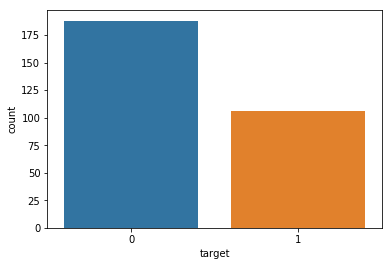

In [16]:
# Hungria
axH = sns.countplot(x="target", data=data[data.ciudad == 'Hungria'])

# esta variable nos dice la cantidad de personas que tienen problemas del corazon en Cleveland
data[data.ciudad == 'Hungria'].target[data.target>"0"].aggregate('count')

baseline_Hungria = data[data.ciudad == 'Hungria'].target[data.target>"0"].aggregate('count') / 292 *100

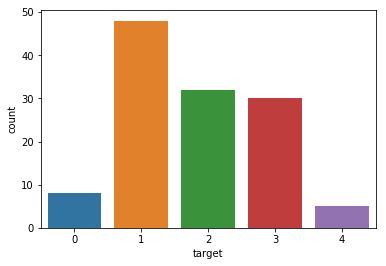

In [17]:
# Suiza
axS = sns.countplot(x="target", data=data[data.ciudad == 'Suiza'])

# esta variable nos dice la cantidad de personas que tienen problemas del corazon en Cleveland
data[data.ciudad == 'Suiza'].target[data.target>"0"].aggregate('count')

baseline_Suiza = data[data.ciudad == 'Suiza'].target[data.target>"0"].aggregate('count') / 116 *100

In [18]:
print ('los baselines por ciudad son:')

print ('Cleveland') 
print(baseline_Cleveland)

print ('Hungria') 
print(baseline_Hungria)

print ('Suiza') 
print(baseline_Suiza)


los baselines por ciudad son:
Cleveland
45.87458745874587
Hungria
36.3013698630137
Suiza
99.13793103448276


 #### ¿Cree que es una buena idea diagnosticar a un paciente de Cleveland utilizando un modelo entrenado con todos los datos disponibles de las 3 ciudades?

 No, tanto como se puede ver en los baselines como se puede ver en las visualizaciones, las probabilidades de que una persona esté enferma de una enfermedad al corazon varían mucho dependiendo del lugar donde se haga el estudio. Si se hiciera un análisis de datos, sería necesario hacer uno por cada una de las ciudades

## 1.2 Análisis y solución de los problemas de calidad de datos

In [19]:
data.dtypes
# necesitamos transformar los datos

ciudad         object
edad          float64
sexo           object
tipo_dolor     object
presion        object
colesterol     object
azucar         object
ecg            object
pulso          object
angina         object
st             object
pendiente      object
venas          object
thal           object
target         object
dtype: object

#### Se nota la existencia de un '?' cuando un dato es faltante, lo que presenta inconformidades al momento de intentar transformarlo. Por esto se comenzara a buscar los elementos que tengan este '?' en sus filas y se verá que se hace dependiendo de su representatividad

In [20]:
data[data == '?'].aggregate('count')

ciudad          0
edad            0
sexo            0
tipo_dolor      0
presion         3
colesterol     23
azucar         83
ecg             2
pulso           2
angina          2
st              6
pendiente     207
venas         413
thal          320
target          0
dtype: int64

In [21]:
data.shape[0]

720

#### Columnas como presion, ecg, pulso, angina y st, tienen numeros pequeños, razón que causa que se eliminen esas filas por su poca representación.

#### Por otro lado existen columnas como colesterol y azucar, que pueden ser recuperadas. Para el colesterol, se colocará  un promedio de todos los datos que existen, para esto se van a eliminar los datos con '?', se transformará a una variable numérica, se buscara el 'mean', y se anotará, luego se volvera a correr el código, con esa parte comentada. Para el azucar se buscará el valor más frecuente

In [22]:
data = data [data.presion != '?']
data = data [data.ecg != '?']
data = data [data.pulso != '?']
data = data [data.angina != '?']
data = data [data.st != '?']

In [23]:
data[data == '?'].aggregate('count')

ciudad          0
edad            0
sexo            0
tipo_dolor      0
presion         0
colesterol     23
azucar         78
ecg             0
pulso           0
angina          0
st              0
pendiente     200
venas         404
thal          316
target          0
dtype: int64

In [24]:
# data = data [data.colesterol != '?']
# data.colesterol = data.colesterol.astype('float64')

### El mean de colesterol es : 206.5. Se volverá a correr el código y se comentará esa línea de código.

In [25]:
data.colesterol[data.colesterol == '?'] = '206.5'

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 711 entries, 0 to 719
Data columns (total 15 columns):
ciudad        711 non-null object
edad          711 non-null float64
sexo          711 non-null object
tipo_dolor    711 non-null object
presion       711 non-null object
colesterol    711 non-null object
azucar        711 non-null object
ecg           711 non-null object
pulso         711 non-null object
angina        711 non-null object
st            711 non-null object
pendiente     711 non-null object
venas         711 non-null object
thal          711 non-null object
target        711 non-null object
dtypes: float64(1), object(14)
memory usage: 88.9+ KB


In [27]:
data.head()

,ciudad,edad,sexo,tipo_dolor,presion,colesterol,azucar,ecg,pulso,angina,st,pendiente,venas,thal,target
0,Cleveland,63.0,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0,6,0
1,Cleveland,67.0,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3,3,2
2,Cleveland,67.0,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2,7,1
3,Cleveland,37.0,1,3,130.0,250.0,0,0,187.0,0,3.5,3,0,3,0
4,Cleveland,41.0,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0,3,0


## Se va a comenzar a buscar el valor más frecuente de head

In [28]:
data.describe()

,edad
count,711.000000
mean,51.897328
std,9.140030
min,28.000000
25%,45.000000
50%,53.000000
75%,58.000000
max,77.000000


In [29]:
# Esto nos da el dato más repetido, lo corroboraremos mediante un countplot
data.azucar.mode() 

0    0
dtype: object

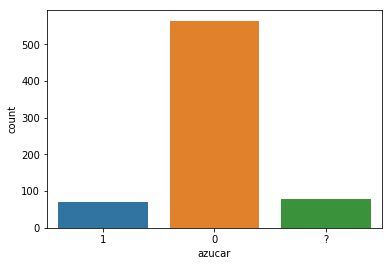

In [30]:
axA = sns.countplot(x="azucar", data=data)

## Se confirma que 0 es el más repetido, entonces se sutituirán los '?' por 0.

In [31]:
data.azucar[data.azucar == '?'] = '0'

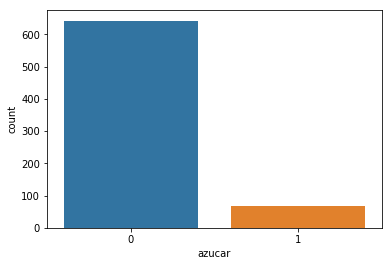

In [32]:
# confirmamos con un countplot
axA = sns.countplot(x="azucar", data=data)

In [33]:
data[data == '?'].aggregate('count')

ciudad          0
edad            0
sexo            0
tipo_dolor      0
presion         0
colesterol      0
azucar          0
ecg             0
pulso           0
angina          0
st              0
pendiente     200
venas         404
thal          316
target          0
dtype: int64

#### Quedan pendiente, venas y thal. Se considera que la representatividad de '?' es muy alta, debido a esto, se van a eliminar las columnas. Se eliminan porque a pesar de que su representatividad en Cleveland es más bien baja, en Suiza y Hungría es muy alta, y dejarlo haría la aplicabilidad de los datos para otros modelos casi nula, y habría que hacer otra preparación de los datos.

In [34]:
data = data.drop(["pendiente"], axis=1)
data = data.drop(["venas"], axis=1)
data = data.drop(["thal"], axis=1)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 711 entries, 0 to 719
Data columns (total 12 columns):
ciudad        711 non-null object
edad          711 non-null float64
sexo          711 non-null object
tipo_dolor    711 non-null object
presion       711 non-null object
colesterol    711 non-null object
azucar        711 non-null object
ecg           711 non-null object
pulso         711 non-null object
angina        711 non-null object
st            711 non-null object
target        711 non-null object
dtypes: float64(1), object(11)
memory usage: 92.2+ KB


In [36]:
# Se verá cuantos datos se han eliminado y cuantos quedan en el total de datos. Se sacará un porcentaje de la cantidad de datos eliminados

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 711 entries, 0 to 719
Data columns (total 12 columns):
ciudad        711 non-null object
edad          711 non-null float64
sexo          711 non-null object
tipo_dolor    711 non-null object
presion       711 non-null object
colesterol    711 non-null object
azucar        711 non-null object
ecg           711 non-null object
pulso         711 non-null object
angina        711 non-null object
st            711 non-null object
target        711 non-null object
dtypes: float64(1), object(11)
memory usage: 92.2+ KB


In [37]:
(720-711) / 720 * 100

1.25

#### Se han eliminado el 1.25% de todas las filas de datos

#### Transformaremos los valores en numéricos

In [38]:
data.dtypes

ciudad         object
edad          float64
sexo           object
tipo_dolor     object
presion        object
colesterol     object
azucar         object
ecg            object
pulso          object
angina         object
st             object
target         object
dtype: object

In [39]:
data.st = data.st.astype('float64')
data.presion = data.presion.astype('float64')
data.colesterol = data.colesterol.astype('float64')
data.pulso = data.pulso.astype('float64')

In [40]:
data.dtypes

ciudad         object
edad          float64
sexo           object
tipo_dolor     object
presion       float64
colesterol    float64
azucar         object
ecg            object
pulso         float64
angina         object
st            float64
target         object
dtype: object

Para target no nos interesa saber si es 0, o 1 o 2 etc. Nos interesa saber si tiene peligro o no. Por esto se volverá target una variable categórica binaria.

In [41]:
data.target[data.target != "0"] = "1"

C:\Users\sebas\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [42]:
data.dtypes

ciudad         object
edad          float64
sexo           object
tipo_dolor     object
presion       float64
colesterol    float64
azucar         object
ecg            object
pulso         float64
angina         object
st            float64
target         object
dtype: object

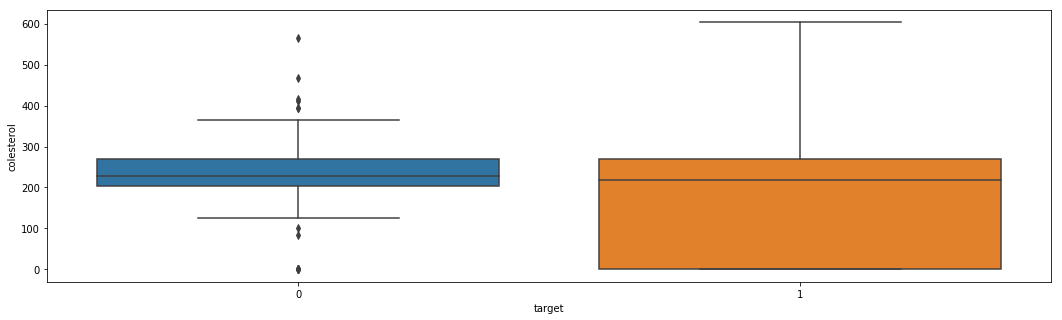

In [43]:
plt.figure(figsize=(18,5))
sns.boxplot(x="target", y="colesterol", data=data)

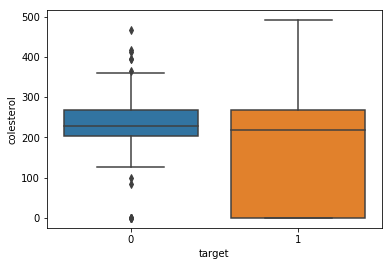

In [44]:
data = data[data.colesterol < 500]
sns.boxplot(x="target", y="colesterol", data=data)

# 2. Modelamiento con K-NN y Naïve Bayes

 ## Puntos a desarrollar:
 
 <font color='red'>Construya y escoja el mejor modelo de diagnóstico posible (buscando los mejores parámetros) utilizando las técnicas KNN y NaïveBayes para un paciente de Cleveland. Básese en la métrica de evaluación del modelo adecuada, utilizando 10-fold cross validation para encontrar los parámetros ideales del modelo</font>
 
 1. <font color='red'> Construcción del mejor modelo en KNN para Cleveland. Solo considere las variables independientes numéricas. (1.0)</font>
 
 
 2. <font color='red'> Construcción del mejor modelo en NaiveBayes para Cleveland.</font>
 
 2.1. <font color='red'>Para las variables numéricas utilice un GaussianNB, buscando el mejor valor del parámetro var_smoothing entre 0.1 Y 5. (0.6)</font>
 
 2.2. <font color='red'>Para las variables categóricas utilice un BernouilliNB, buscando el mejor valor del parámetro alpha (suavizador de Lapace) entre 1 y 100. (0.8)</font>
 
 2.3. <font color='red'>Concluya sobre la calidad de los modelos y su escogencia. (0.3)</font>
 
 2.4. <font color='red'>**BONUS!!!!!** Construya un modelo que agrupe los dos clasificadores de Naive Bayes. Utilice las probabilidades de predicción de cada clase que se obtienen con el método "modelo.predict_proba(X)" tanto para el modelo de variables numéricas como para el modelo con las variables categóricas y multiplíquelas, prediciendo entonces la clases con mayo verosimilitud (0.5)</font>
 
 
 Tenga en cuenta lo siguiente: 
 - Utilice holdout 70% y 30% para evaluar el modelo final. Particione los datos inicialmente en entrenamiento y test. Utilice un random_state=12345 en el método train_test_split para poder reproducir los resultados.
 - Utilice 10-fold cross validation para buscar el mejor valor de los parámetros utilizando solo el set de entrenamiento.
 - Una vez que el valor de los parámetros ideal se ha encontrado, evalúe sobre el test set, calculando las métricas correspondientes

## 2.1 Modelo KNN para variables numéricas

In [45]:
import warnings
warnings.filterwarnings("ignore")

In [46]:
X = data[data.ciudad == 'Cleveland'].loc[:,['edad', 'presion', 'colesterol', 'pulso', 'st']]
print(X.shape)
X.head()

(302, 5)


,edad,presion,colesterol,pulso,st
0,63.0,145.0,233.0,150.0,2.3
1,67.0,160.0,286.0,108.0,1.5
2,67.0,120.0,229.0,129.0,2.6
3,37.0,130.0,250.0,187.0,3.5
4,41.0,130.0,204.0,172.0,1.4


In [47]:
y = data[data.ciudad == 'Cleveland'].loc[:,['target']]
print(y.shape)
y.head()

(302, 1)


,target
0,0
1,1
2,1
3,0
4,0


In [48]:
y = data[data.ciudad == 'Cleveland'].loc[:,['target']]
print(y.shape)
y.head()

(302, 1)


,target
0,0
1,1
2,1
3,0
4,0


In [49]:
y = data[data.ciudad == 'Cleveland'].loc[:,['target']]
print(y.shape)
y.head()

(302, 1)


,target
0,0
1,1
2,1
3,0
4,0


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345, stratify=y)

In [51]:
# Crear un normalizador Min-Max
# Necesitamos normalizar los datos para que variables no opaque otras
min_max_scaler = preprocessing.MinMaxScaler()

# Aprender sus parámetros con el set de entrenamiento y transformar los dos datasets
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)


In [52]:
y_train = np.squeeze(y_train)
y_test = np.squeeze(y_test)

In [53]:
y_train

54     1
122    0
33     0
189    1
133    0
72     1
157    1
115    0
120    1
61     0
241    0
232    1
151    0
0      0
290    1
283    0
75     0
224    1
89     0
141    1
171    0
187    1
55     1
153    1
221    0
42     0
129    0
209    1
28     0
240    0
      ..
107    1
119    1
251    1
98     0
230    0
201    0
233    0
203    0
103    0
262    0
36     1
194    0
181    1
48     0
14     0
180    1
76     1
250    0
82     0
73     1
15     0
96     1
87     0
271    0
270    1
50     0
95     1
165    0
112    0
246    1
Name: target, Length: 211, dtype: object

### Se utilizará recall en lugar de accuracy, porque no nos importa tanto si una persona que no tiene peligro de enfermedades para el corazón, se les diagnostica. Pero sería imperdonable si, una persona con peligro de enfermedades en el corazón, no se le diagnostica su problema.

In [54]:
# Crea los vectores para la grafica y para el almacemiento de los resultados del modelo

# Define Vectores de Accuracy
rec_train_vec=[]
rec_test_vec=[]

# Define Vectores de Kappa
kappa_train_vec=[]
kappa_test_vec=[]

# Definimos la cantidad de K que van a haber en el Modelo
k_vec= np.arange(1,201,2)

# Correr el Modelo
for k in k_vec:
    # Crea Modelo KNN
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    
    # Aplica Modelo al conjunto de Entrenamiento
    knn.fit(X_train_scaled, y_train)
    
    # Predecir la variable Y según el modelo en el conjunto de Entramiento
    y_pred = knn.predict(X_train_scaled)
    
    # Agrega los resultados en los vectores de entrenamiento
    rec_train_vec.append(metrics.recall_score(y_train, y_pred, average='macro'))
    kappa_train_vec.append(metrics.cohen_kappa_score(y_train, y_pred))
    
    # Predecir la variable Y según el modelo en el conjunto de Test
    y_pred = knn.predict(X_test_scaled)
    
    # Agrega los resultados en los vectores de Test
    rec_test_vec.append(metrics.recall_score(y_test, y_pred, average='macro'))
    kappa_test_vec.append(metrics.cohen_kappa_score(y_test, y_pred))

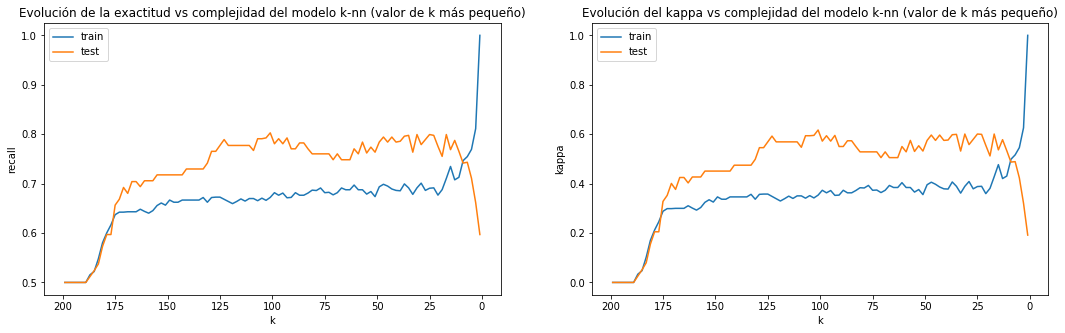

In [55]:
fig = plt.figure(figsize=(18,5))

fig.add_subplot(1, 2, 1)
ax = plt.gca() # get current axis
plt.plot(k_vec, rec_train_vec)
plt.plot(k_vec, rec_test_vec)
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('k')
plt.ylabel('recall')
plt.title('Evolución de la exactitud vs complejidad del modelo k-nn (valor de k más pequeño)')
plt.legend(['train', 'test'])

fig.add_subplot(1, 2, 2)
ax = plt.gca() # get current axis
plt.plot(k_vec, kappa_train_vec)
plt.plot(k_vec, kappa_test_vec)
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('k')
plt.ylabel('kappa')
plt.title('Evolución del kappa vs complejidad del modelo k-nn (valor de k más pequeño)')
plt.legend(['train', 'test'])

In [56]:
k_optimo = k_vec[np.argmax(rec_test_vec)]
acc_optima= max(rec_test_vec)
print("El óptimo se obtiene con K=%d, que produce un %.2f%% de exactitud" %(k_optimo, 100*acc_optima))

k_optimo = k_vec[np.argmax(kappa_test_vec)]
kappa_optima= max(rec_test_vec)
print("El óptimo se obtiene con K=%d, que produce un %.2f%% de kappa" %(k_optimo, 100*kappa_optima))

El óptimo se obtiene con K=101, que produce un 80.27% de exactitud
El óptimo se obtiene con K=101, que produce un 80.27% de kappa


In [57]:
knn = neighbors.KNeighborsClassifier(n_neighbors=k_optimo)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
rec_test_vec.append(metrics.recall_score(y_test, y_pred, average='macro'))

In [58]:
print("Exactitud : ", metrics.accuracy_score(y_test, y_pred))
print("Kappa     : ", metrics.cohen_kappa_score(y_test, y_pred))
print("Precisión : ", metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall    : ", metrics.recall_score(y_test, y_pred, average='macro'))

Exactitud :  0.8131868131868132
Kappa     :  0.6169844020797227
Precisión :  0.8349462365591398
Recall    :  0.8027210884353742


## 2.2 Modelo Naïve Bayes para variables numéricas

### Modelo para variables numéricas

In [55]:
X = data[data.ciudad == 'Cleveland'].loc[:,['edad', 'presion', 'colesterol', 'pulso', 'st']]
print(X.shape)
X.head()

(303, 5)


,edad,presion,colesterol,pulso,st
0,63.0,145.0,233.0,150.0,2.3
1,67.0,160.0,286.0,108.0,1.5
2,67.0,120.0,229.0,129.0,2.6
3,37.0,130.0,250.0,187.0,3.5
4,41.0,130.0,204.0,172.0,1.4


In [56]:
y = data[data.ciudad == 'Cleveland'].loc[:,['target']]
print(y.shape)
y.head()

(303, 1)


,target
0,0
1,1
2,1
3,0
4,0


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345, stratify=y)

### Se intenta hacer la cross-validation con recall, y con kappa, pero ofrece estos errores 
 Target is multiclass but average='binary'. Please choose another average setting.
 'kappa' is not a valid scoring value. Use sorted(sklearn.metrics.SCORERS.keys()) to get valid options.
 
### Por esta razón no se encontrará el smooth ideal y el alpha con holdout
 

In [58]:
#min_max_scaler = preprocessing.MinMaxScaler()

# Aprender sus parámetros con el set de entrenamiento y transformar los dos datasets
#X_train_scaled = min_max_scaler.fit_transform(X_train)
#X_test_scaled = min_max_scaler.transform(X_test)

#rec_mean_vec=[]
#smooth_vec= np.arange(0,5.2,0.1)

#for smooth in smooth_vec:
#    naiveb = GaussianNB(var_smoothing=smooth)
#    naiveb.fit(X_train_scaled, y_train)
#    
#    rec_vec_fold = cross_val_score(naiveb, X_train_scaled, np.squeeze(y_train), cv=10, scoring='kappa')
#    rec_mean_vec.append(rec_vec_fold.mean())

In [59]:
min_max_scaler = preprocessing.MinMaxScaler()

# Aprender sus parámetros con el set de entrenamiento y transformar los dos datasets
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)

rec_test_vec=[]
smooth_vec= np.arange(0,5.2,0.1)

for smooth in smooth_vec:
    naiveb = GaussianNB(var_smoothing=smooth)
    naiveb.fit(X_train_scaled, y_train)
    
    y_pred = naiveb.predict(X_test_scaled)
    rec_test_vec.append(metrics.recall_score(y_test, y_pred, average='macro'))


Text(0.5, 1.0, 'Evolución de le recall vs smooth')

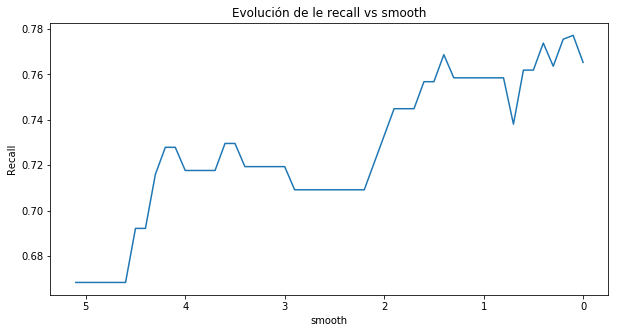

In [60]:
plt.figure(figsize=(10,5))
ax = plt.gca() # get current axis
plt.plot(smooth_vec, rec_test_vec)
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('smooth')
plt.ylabel('Recall')
plt.title('Evolución de le recall vs smooth')

In [61]:
smooth_optimo = smooth_vec[np.argmax(rec_test_vec)]
rec_optima= max(rec_test_vec)
print("El óptimo se obtiene con smooth=%f, que produce un %.3f%% de recall" %(smooth_optimo, 100*rec_optima))

El óptimo se obtiene con smooth=0.100000, que produce un 77.721% de recall


In [62]:
smooths = pd.DataFrame({"smooth": smooth_vec, "recall": rec_test_vec})
smooths

,smooth,recall
0,0.0,0.765306
1,0.1,0.777211
2,0.2,0.775510
3,0.3,0.763605
4,0.4,0.773810
5,0.5,0.761905
6,0.6,0.761905
7,0.7,0.738095
8,0.8,0.758503
9,0.9,0.758503


Se seleccionara el smooth de: 0.1, que se encuentra entre 0.0 y 0.3. Para seleccionar un promedio 

### Se evaluará el modelo con un var_smoothing de 0.1

In [63]:
naiveb = GaussianNB(var_smoothing=0.1)
naiveb.fit(X_test_scaled, y_test)
y_pred = naiveb.predict(X_test_scaled)

In [64]:
print("Exactitud : ", metrics.accuracy_score(y_test, y_pred))
print("Kappa     : ", metrics.cohen_kappa_score(y_test, y_pred))
print("Precisión : ", metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall    : ", metrics.recall_score(y_test, y_pred, average='macro'))

Exactitud :  0.8021978021978022
Kappa     :  0.6006825938566553
Precisión :  0.8019607843137255
Recall    :  0.7993197278911565


### Modelo para variables categóricas

In [65]:
X = data[data.ciudad == 'Cleveland'].loc[:,['sexo', 'tipo_dolor', 'azucar', 'ecg', 'angina']]
print(X.shape)
X.head()

(303, 5)


,sexo,tipo_dolor,azucar,ecg,angina
0,1,1,1,2,0
1,1,4,0,2,1
2,1,4,0,2,1
3,1,3,0,0,0
4,0,2,0,2,0


In [66]:
y = data[data.ciudad == 'Cleveland'].loc[:,['target']]
print(y.shape)
y.head()

(303, 1)


,target
0,0
1,1
2,1
3,0
4,0


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345, stratify=y)

In [68]:
rec_test_vec=[]
alpha_vec= np.arange(0,100,1)

for alpha in alpha_vec:
    naiveb = BernoulliNB(alpha=alpha)
    naiveb.fit(X_train, y_train)
    
    y_pred = naiveb.predict(X_test)
    rec_test_vec.append(metrics.recall_score(y_test, y_pred, average='macro'))


Text(0.5, 1.0, 'Evolución de le recall vs alpha')

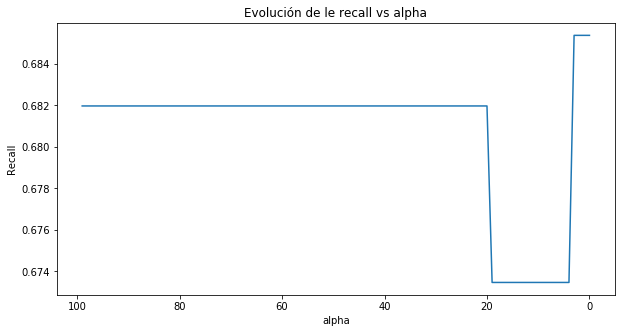

In [69]:
plt.figure(figsize=(10,5))
ax = plt.gca() # get current axis
plt.plot(alpha_vec, rec_test_vec)
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Recall')
plt.title('Evolución de le recall vs alpha')

In [70]:
alpha_optimo = alpha_vec[np.argmax(rec_test_vec)]
rec_optima= max(rec_test_vec)
print("El óptimo se obtiene con smooth=%f, que produce un %.3f%% de alpha" %(alpha_optimo, 100*rec_optima))

El óptimo se obtiene con smooth=0.000000, que produce un 68.537% de alpha


In [71]:
alphas = pd.DataFrame({"alpha": alpha_vec, "recall": rec_test_vec})
alphas

,alpha,recall
0,0,0.685374
1,1,0.685374
2,2,0.685374
3,3,0.685374
4,4,0.673469
5,5,0.673469
6,6,0.673469
7,7,0.673469
8,8,0.673469
9,9,0.673469


Se seleccionara el smooth de: 2, que se encuentra entre 0 y 4. Para seleccionar un promedio 

### Se evaluará el modelo con un alpha de 2

In [72]:
naiveb = BernoulliNB(alpha=2)
naiveb.fit(X_test, y_test)
y_pred = naiveb.predict(X_test)

In [73]:
print("Exactitud : ", metrics.accuracy_score(y_test, y_pred))
print("Kappa     : ", metrics.cohen_kappa_score(y_test, y_pred))
print("Precisión : ", metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall    : ", metrics.recall_score(y_test, y_pred, average='macro'))

Exactitud :  0.7032967032967034
Kappa     :  0.4040747028862479
Precisión :  0.7017926356589147
Recall    :  0.7023809523809523


### Conclusiones